In [1]:
#导入相关的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import missingno as msno
%matplotlib inline

In [2]:
#导入训练集
train_datas = pd.read_csv('train_set.csv')
train_datas.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [3]:
#导入测试集
test_datas = pd.read_csv('test_set.csv')
test_datas.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25318,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,25319,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,25320,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,25321,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,25322,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown


In [4]:
#将月转成1-12
mapdict = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,
                    'nov':11,'dec':12}}
train_data = train_datas.replace(mapdict)
test_data = test_datas.replace(mapdict)
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,5,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,4,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,7,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,7,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,5,187,5,-1,0,unknown,0


In [5]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25318,51,housemaid,married,unknown,no,174,no,no,telephone,29,7,308,3,-1,0,unknown
1,25319,32,management,married,tertiary,no,6059,yes,no,cellular,20,11,110,2,-1,0,unknown
2,25320,60,retired,married,primary,no,0,no,no,telephone,30,7,130,3,-1,0,unknown
3,25321,32,student,single,tertiary,no,64,no,no,cellular,30,6,598,4,105,5,failure
4,25322,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,7,368,4,-1,0,unknown


In [6]:
#将文字类型转化
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for col in train_data.columns[train_data.dtypes=='object']:
    le = LabelEncoder()
    le.fit(train_data[col])
    train_data[col] = le.transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

#观察现在的训练集
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,4,1,2,0,291,1,0,2,9,5,150,2,-1,0,3,0
1,2,42,9,0,0,0,5076,1,0,0,7,4,99,1,251,2,1,0
2,3,47,0,1,1,0,104,1,1,0,14,7,77,2,-1,0,3,0
3,4,28,4,2,1,0,-994,1,1,0,18,7,174,2,-1,0,3,0
4,5,42,9,0,1,0,2974,1,0,2,21,5,187,5,-1,0,3,0


In [7]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25318,51,3,1,3,0,174,0,0,1,29,7,308,3,-1,0,3
1,25319,32,4,1,2,0,6059,1,0,0,20,11,110,2,-1,0,3
2,25320,60,5,1,0,0,0,0,0,1,30,7,130,3,-1,0,3
3,25321,32,8,2,2,0,64,0,0,0,30,6,598,4,105,5,0
4,25322,41,3,1,1,0,0,1,1,0,15,7,368,4,-1,0,3


In [8]:
#构造特征
map_dict = {'poutcome':['mean','min']}
train_groupby = train_data.groupby(['month','day']).agg(map_dict)
test_groupby = test_data.groupby(['month','day']).agg(map_dict)
train_data = pd.merge(train_groupby, train_data, on=['month','day'])
test_data = pd.merge(test_groupby, test_data, on=['month','day'])
train_data.head()

G:\AIAIAI\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
G:\AIAIAI\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,month,day,"(poutcome, mean)","(poutcome, min)",ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,6,3.0,3,4596,38,1,1,1,0,863,0,0,2,78,1,-1,0,3,0
1,1,7,3.0,3,6878,33,0,0,1,0,212,1,0,2,23,1,-1,0,3,0
2,1,7,3.0,3,16986,40,0,0,1,0,212,0,0,2,176,1,-1,0,3,0
3,1,8,2.0,0,4338,50,2,0,2,0,315,0,0,0,249,1,119,1,0,0
4,1,8,2.0,0,15953,27,4,2,2,0,8,0,0,1,176,2,-1,0,3,0


In [9]:
test_data.head()

,month,day,"(poutcome, mean)","(poutcome, min)",ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,1,7,3.000000,3,27928,45,10,1,1,0,891,1,0,2,118,1,-1,0,3
1,1,7,3.000000,3,30519,51,9,0,2,0,363,1,0,2,7,1,-1,0,3
2,1,8,3.000000,3,27389,27,4,2,1,0,843,0,0,0,187,1,-1,0,3
3,1,11,0.333333,0,27731,70,5,1,0,0,3230,0,0,0,300,2,48,1,0
4,1,11,0.333333,0,31533,29,7,2,1,0,102,0,0,0,111,1,210,4,0


In [10]:
#数据标准化
need_minmax = ['age','balance','duration','pdays','previous','campaign']
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mms = MinMaxScaler()
mms.fit(train_data[need_minmax])
train_data[need_minmax] = mms.transform(train_data[need_minmax])
test_data[need_minmax] = mms.transform(test_data[need_minmax])

#观察现在的训练集
train_data.head()

G:\AIAIAI\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,month,day,"(poutcome, mean)","(poutcome, min)",ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,6,3.0,3,4596,0.259740,1,1,1,0,0.080638,0,0,2,0.020098,0.000000,0.000000,0.000000,3,0
1,1,7,3.0,3,6878,0.194805,0,0,1,0,0.074728,1,0,2,0.005926,0.000000,0.000000,0.000000,3,0
2,1,7,3.0,3,16986,0.285714,0,0,1,0,0.074728,0,0,2,0.045349,0.000000,0.000000,0.000000,3,0
3,1,8,2.0,0,4338,0.415584,2,0,2,0,0.075663,0,0,0,0.064159,0.000000,0.140351,0.003636,0,0
4,1,8,2.0,0,15953,0.116883,4,2,2,0,0.072876,0,0,1,0.045349,0.018519,0.000000,0.000000,3,0


In [11]:
test_data.head()

,month,day,"(poutcome, mean)","(poutcome, min)",ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,1,7,3.000000,3,27928,0.350649,10,1,1,0,0.080893,1,0,2,0.030405,0.000000,0.000000,0.000000,3
1,1,7,3.000000,3,30519,0.428571,9,0,2,0,0.076099,1,0,2,0.001804,0.000000,0.000000,0.000000,3
2,1,8,3.000000,3,27389,0.116883,4,2,1,0,0.080457,0,0,0,0.048183,0.000000,0.000000,0.000000,3
3,1,11,0.333333,0,27731,0.675325,5,1,0,0,0.102128,0,0,0,0.077300,0.018519,0.057310,0.003636,0
4,1,11,0.333333,0,31533,0.142857,7,2,1,0,0.073729,0,0,0,0.028601,0.000000,0.246784,0.014545,0


In [12]:
#删除y
labels = train_data['y']
train_data = train_data.drop(['y','ID'],axis=1)
test_data = test_data.sort_values(by='ID')
train_data.head()

,month,day,"(poutcome, mean)","(poutcome, min)",age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,1,6,3.0,3,0.259740,1,1,1,0,0.080638,0,0,2,0.020098,0.000000,0.000000,0.000000,3
1,1,7,3.0,3,0.194805,0,0,1,0,0.074728,1,0,2,0.005926,0.000000,0.000000,0.000000,3
2,1,7,3.0,3,0.285714,0,0,1,0,0.074728,0,0,2,0.045349,0.000000,0.000000,0.000000,3
3,1,8,2.0,0,0.415584,2,0,2,0,0.075663,0,0,0,0.064159,0.000000,0.140351,0.003636,0
4,1,8,2.0,0,0.116883,4,2,2,0,0.072876,0,0,1,0.045349,0.018519,0.000000,0.000000,3


In [13]:
test_data.head()

,month,day,"(poutcome, mean)","(poutcome, min)",ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
7688,7,29,2.847059,0,25318,0.428571,3,1,3,0,0.074383,0,0,1,0.079361,0.037037,0.000000,0.000000,3
10390,11,20,2.360656,0,25319,0.181818,4,1,2,0,0.127812,1,0,0,0.028343,0.018519,0.000000,0.000000,3
7773,7,30,2.969072,1,25320,0.545455,5,1,0,0,0.072803,0,0,1,0.033497,0.037037,0.000000,0.000000,3
6362,6,30,2.250000,0,25321,0.181818,8,2,2,0,0.073384,0,0,0,0.154084,0.055556,0.123977,0.018182,0
6946,7,15,2.812500,0,25322,0.298701,3,1,1,0,0.072803,1,1,0,0.094821,0.055556,0.000000,0.000000,3


In [14]:
#将数据分割为训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data,labels,test_size=0.25,random_state=42)
X_train.head()

,month,day,"(poutcome, mean)","(poutcome, min)",age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
11193,5,28,2.978056,0,0.337662,1,1,1,0,0.078042,1,0,2,0.051275,0.037037,0.0,0.0,3
8588,5,15,2.282092,0,0.467532,9,1,2,0,0.114403,1,0,2,0.042515,0.000000,0.0,0.0,3
18824,8,4,2.649573,0,0.779221,5,1,1,0,0.074801,0,0,0,0.056686,0.000000,0.0,0.0,3
24536,11,20,2.402913,0,0.181818,1,1,0,0,0.188150,1,0,0,0.054367,0.000000,0.0,0.0,3
13510,6,12,2.903226,0,0.389610,4,0,2,0,0.077370,0,1,2,0.320278,0.111111,0.0,0.0,3


In [15]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# xgb矩阵赋值

xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_val = xgb.DMatrix(X_valid, label=y_valid)
#xgb_test = xgb.DMatrix(X_test)

# xgboost模型 #####################

params = {
    'booster': 'gbtree',
    # 'objective': 'multi:softmax',  # 多分类的问题、
    # 'objective': 'multi:softprob',   # 多分类概率
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    # 'num_class': 9,  # 类别数，与 multisoftmax 并用
    'gamma': 0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 8,  # 构建树的深度，越大越容易过拟合
    'alpha': 0,   # L1正则化系数
    'lambda': 10,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.8,  # 随机采样训练样本
    'colsample_bytree': 0.8,  # 生成树时进行的列采样
    'min_child_weight': 1,
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    # ，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    # 这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
    'silent': 0,  # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.08,  # 如同学习率
    'seed': 1000,
    'nthread': -1,  # cpu 线程数
    'missing': 1,
    'scale_pos_weight': (np.sum(y_train==0)/np.sum(y_train==1))  # 用来处理正负样本不均衡的问题, 通常取：sum(negative cases) / sum(positive cases)
    # 'eval_metric': 'auc'

}

plst = list(params.items())
num_rounds = 1000  # 迭代次数
watchlist = [(xgb_train, 'train'), (xgb_val, 'val')]

model = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=80)
#model = xgb.train(plst, xgb_train, num_rounds, early_stopping_rounds=80)
y_train_pred = model.predict(xgb_train)
auc_score_train = roc_auc_score(y_train, y_train_pred)
y_valid_pred = model.predict(xgb_val)
auc_score_valid = roc_auc_score(y_valid, y_valid_pred)

print('训练集的 auc score is:',auc_score_train)
print('测试集的 auc score is:',auc_score_valid)

G:\AIAIAI\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.913699	val-auc:0.894514
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 80 rounds.
[1]	train-auc:0.926876	val-auc:0.910011
[2]	train-auc:0.929623	val-auc:0.914402
[3]	train-auc:0.934564	val-auc:0.917531
[4]	train-auc:0.937147	val-auc:0.919061
[5]	train-auc:0.939916	val-auc:0.921553
[6]	train-auc:0.941024	val-auc:0.922259
[7]	train-auc:0.941689	val-auc:0.923295
[8]	train-auc:0.943411	val-auc:0.924344
[9]	train-auc:0.944552	val-auc:0.925107
[10]	train-auc:0.945522	val-auc:0.925765
[11]	train-auc:0.947131	val-auc:0.926442
[12]	train-auc:0.950561	val-auc:0.928459
[13]	train-auc:0.952446	val-auc:0.929623
[14]	train-auc:0.953314	val-auc:0.930296
[15]	train-auc:0.953532	val-auc:0.930215
[16]	train-auc:0.954904	val-auc:0.930634
[17]	train-auc:0.955443	val-auc:0.931145
[18]	train-auc:0.955911	val-auc:0.931594
[19]	train-auc:0.956911	val-auc:0.931956
[20]	train-auc:0.957745	val-auc:0.932621
[21]	train

训练集的 auc score is: 0.9947136499918824
测试集的 auc score is: 0.9371816548463358


In [16]:
test_data = test_data.drop('ID',axis=1).reset_index().drop('index',axis=1)
test_data.head()

,month,day,"(poutcome, mean)","(poutcome, min)",age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,7,29,2.847059,0,0.428571,3,1,3,0,0.074383,0,0,1,0.079361,0.037037,0.000000,0.000000,3
1,11,20,2.360656,0,0.181818,4,1,2,0,0.127812,1,0,0,0.028343,0.018519,0.000000,0.000000,3
2,7,30,2.969072,1,0.545455,5,1,0,0,0.072803,0,0,1,0.033497,0.037037,0.000000,0.000000,3
3,6,30,2.250000,0,0.181818,8,2,2,0,0.073384,0,0,0,0.154084,0.055556,0.123977,0.018182,0
4,7,15,2.812500,0,0.298701,3,1,1,0,0.072803,1,1,0,0.094821,0.055556,0.000000,0.000000,3


In [20]:
xgb_test = xgb.DMatrix(test_data)
y_test_pred = model.predict(xgb_test)
df=pd.DataFrame([test_datas['ID'], y_test_pred]).T
df.columns=['ID','pred']
df.head()

,ID,pred
0,25318.0,0.242718
1,25319.0,0.006861
2,25320.0,0.002153
3,25321.0,0.960756
4,25322.0,0.043867


G:\AIAIAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


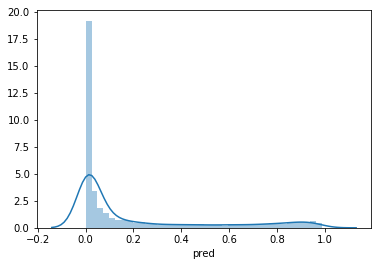

In [21]:
sns.distplot(df.pred)

In [22]:
df.to_csv('test_pred_324_2.csv',index=False)